In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

%matplotlib inline
import seaborn as sns
#from IPython.display import Image
#import matplotlib.pyplot as plt
#import pydotplus

In [2]:
def get_data(week_nums):
    # base url
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        # concat our week onto url..
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)
        
week_nums = [170422]#, 170429, 170506, 170513]
# Test against Julia's nums
#week_nums = [160903, 160910, 160917]
df = get_data(week_nums)

In [3]:
df.columns = [column.strip() for column in df.columns]

In [4]:
df.columns.tolist()

['C/A',
 'UNIT',
 'SCP',
 'STATION',
 'LINENAME',
 'DIVISION',
 'DATE',
 'TIME',
 'DESC',
 'ENTRIES',
 'EXITS']

In [5]:
# df.DATE.value_counts().sort_index()

In [6]:
df['KEY'] = df['C/A'] + ',' + df['UNIT'] + ',' + df['SCP'] + ',' + df['STATION']

In [7]:
df.dtypes

C/A         object
UNIT        object
SCP         object
STATION     object
LINENAME    object
DIVISION    object
DATE        object
TIME        object
DESC        object
ENTRIES      int64
EXITS        int64
KEY         object
dtype: object

In [8]:
df['DATETIME'] = pd.to_datetime(df['DATE'] + ' ' + df['TIME'],format="%m/%d/%Y %H:%M:%S")

In [9]:
df.DATETIME.head()

0   2017-04-15 00:00:00
1   2017-04-15 04:00:00
2   2017-04-15 08:00:00
3   2017-04-15 12:00:00
4   2017-04-15 16:00:00
Name: DATETIME, dtype: datetime64[ns]

In [10]:
df.shape

(197361, 13)

In [11]:
df.DESC.value_counts()

REGULAR       196381
RECOVR AUD       980
Name: DESC, dtype: int64

In [12]:
(df
 .groupby(["KEY", "DATETIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head()

,KEY,DATETIME,ENTRIES
0,"A002,R051,02-00-00,59 ST",2017-04-15 00:00:00,1
131638,"R145,R032,00-06-01,TIMES SQ-42 ST",2017-04-21 16:00:00,1
131568,"R145,R032,00-06-00,TIMES SQ-42 ST",2017-04-17 00:00:00,1
131569,"R145,R032,00-06-00,TIMES SQ-42 ST",2017-04-17 04:00:00,1
131570,"R145,R032,00-06-00,TIMES SQ-42 ST",2017-04-17 08:00:00,1


In [13]:
# Explore the duplicate entries on 5/9
# mask = ((df["C/A"] == "G001") & 
# (df["UNIT"] == "R151") & 
# (df["SCP"] == "00-00-00") & 
# (df["STATION"] == "CONEY IS-STILLW") &
# # get datetime properties ~ .dt
# (df["DATETIME"].dt.date == datetime.datetime(2017, 5, 9).date()))
# df[mask].head()

In [14]:
# Explore the duplicate entries on 4/28
# mask = ((df["C/A"] == "N329") & 
# (df["UNIT"] == "R201") & 
# (df["SCP"] == "00-00-00") & 
# (df["STATION"] == "WOODHAVEN BLVD") &
# # get datetime properties ~ .dt
# (df["DATETIME"].dt.date == datetime.datetime(2017, 4, 28).date()))
# df[mask].head()

In [15]:
# df.sort_values(["KEY", "DATETIME"], inplace=True,
#               ascending = True)

In [16]:
df.drop_duplicates(subset=["KEY", "DATETIME"], inplace=True)

In [17]:
df.shape # two duplicates were removed

(197361, 13)

In [18]:
df.sort_values(["KEY", "DATETIME"], inplace=True, ascending=True)

In [19]:
# stationMax = df.groupby("STATION").ENTRIES.max()
# stationMax.sort_values(ascending=False)

In [20]:
# df.sort_values(["KEY",'DATETIME'],inplace=True)

In [21]:
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,KEY,DATETIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/15/2017,00:00:00,REGULAR,6136580,2078941,"A002,R051,02-00-00,59 ST",2017-04-15 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/15/2017,04:00:00,REGULAR,6136613,2078947,"A002,R051,02-00-00,59 ST",2017-04-15 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/15/2017,08:00:00,REGULAR,6136639,2078987,"A002,R051,02-00-00,59 ST",2017-04-15 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/15/2017,12:00:00,REGULAR,6136799,2079109,"A002,R051,02-00-00,59 ST",2017-04-15 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/15/2017,16:00:00,REGULAR,6137076,2079173,"A002,R051,02-00-00,59 ST",2017-04-15 16:00:00


In [22]:
df['ENTRYCOUNT'] = df.groupby("KEY")['ENTRIES'].diff()

In [23]:
df = df.drop(["EXITS", "DESC"], axis=1, errors="ignore")

df2 = df.copy()

In [24]:
df.sort_values('ENTRYCOUNT', ascending=False).head(20)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,KEY,DATETIME,ENTRYCOUNT
22446,C021,R212,00-00-02,59 ST,NRW,BMT,04/21/2017,08:00:00,2031090592,"C021,R212,00-00-02,59 ST",2017-04-21 08:00:00,2.020572e+09
23499,C026,R215,01-06-01,86 ST,R,BMT,04/18/2017,16:00:00,117484688,"C026,R215,01-06-01,86 ST",2017-04-18 16:00:00,1.170130e+08
115272,PTH10,R547,00-00-00,9TH STREET,1,PTH,04/16/2017,09:30:19,738627,"PTH10,R547,00-00-00,9TH STREET",2017-04-16 09:30:19,4.660070e+05
113366,PTH05,R543,00-04-00,EXCHANGE PLACE,1,PTH,04/18/2017,10:46:39,162272,"PTH05,R543,00-04-00,EXCHANGE PLACE",2017-04-18 10:46:39,1.622710e+05
120324,PTH20,R549,03-01-00,NEWARK HM HE,1,PTH,04/15/2017,15:43:22,46516,"PTH20,R549,03-01-00,NEWARK HM HE",2017-04-15 15:43:22,4.581800e+04
51961,N072,R012,05-03-01,34 ST-PENN STA,ACE,IND,04/21/2017,09:42:59,3022077,"N072,R012,05-03-01,34 ST-PENN STA",2017-04-21 09:42:59,3.994000e+03
152100,R238,R046,00-00-06,GRD CNTRL-42 ST,4567S,IRT,04/19/2017,20:00:00,3409095,"R238,R046,00-00-06,GRD CNTRL-42 ST",2017-04-19 20:00:00,3.948000e+03
27319,E015,R399,00-00-02,25 AV,D,BMT,04/20/2017,09:00:00,3133768,"E015,R399,00-00-02,25 AV",2017-04-20 09:00:00,3.902000e+03
51995,N072,R012,05-03-02,34 ST-PENN STA,ACE,IND,04/21/2017,09:42:59,4358873,"N072,R012,05-03-02,34 ST-PENN STA",2017-04-21 09:42:59,3.720000e+03
152055,R238,R046,00-00-05,GRD CNTRL-42 ST,4567S,IRT,04/19/2017,20:00:00,2077870,"R238,R046,00-00-05,GRD CNTRL-42 ST",2017-04-19 20:00:00,3.709000e+03


In [25]:
#df["ABSENTRY"] = df.ENTRYCOUNT.abs()

In [26]:
#df.ABSENTRY.isnull

In [27]:
sum(abs(df.ENTRYCOUNT) > 10000)/len(df)

7.6002857707449805e-05

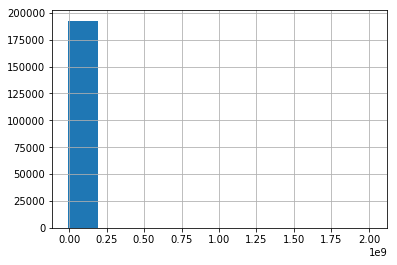

In [28]:
df.ENTRYCOUNT.hist()

In [29]:
# df = df.drop(['EXITS','DESC'],axis=1,errors='ignore')
# df2 = df.copy()

In [30]:
def clean_entries(row, max_counter):
    each = row["ENTRYCOUNT"]
    if each < 0:
        each = -each
    if each > max_counter:
        return 0
    return each

df2['ENTRYCOUNT'] = df2.apply(clean_entries, axis=1, max_counter=10000)

In [31]:
df2StationMax = df2.groupby(['KEY','DATETIME']).ENTRYCOUNT.max()
df2StationMax.sort_values(ascending=False)

KEY                                 DATETIME           
PTH11,R545,00-00-03,14TH STREET     2017-04-17 10:44:51    8372.0
N072,R012,05-03-01,34 ST-PENN STA   2017-04-21 09:42:59    3994.0
R238,R046,00-00-06,GRD CNTRL-42 ST  2017-04-19 20:00:00    3948.0
E015,R399,00-00-02,25 AV            2017-04-20 09:00:00    3902.0
N072,R012,05-03-02,34 ST-PENN STA   2017-04-21 09:42:59    3720.0
R238,R046,00-00-05,GRD CNTRL-42 ST  2017-04-19 20:00:00    3709.0
N072,R012,05-03-03,34 ST-PENN STA   2017-04-21 09:42:59    3687.0
R238,R046,00-00-06,GRD CNTRL-42 ST  2017-04-21 20:00:00    3650.0
N072,R012,05-03-00,34 ST-PENN STA   2017-04-21 09:42:59    3638.0
R238,R046,00-00-07,GRD CNTRL-42 ST  2017-04-19 20:00:00    3532.0
R238,R046,00-00-05,GRD CNTRL-42 ST  2017-04-21 20:00:00    3438.0
N072,R012,05-03-04,34 ST-PENN STA   2017-04-21 09:42:59    3436.0
R238,R046,00-00-07,GRD CNTRL-42 ST  2017-04-21 20:00:00    3207.0
R238,R046,00-00-06,GRD CNTRL-42 ST  2017-04-18 20:00:00    3203.0
R240,R047,00-03-08,G

In [32]:
# diffStationMin = df.groupby("STATION").ENTRYCOUNT.min()
# diffStationMin.sort_values(ascending=True)

In [33]:
# stationMax = df.groupby("STATION").ENTRYCOUNT.max()
# stationMax.sort_values(ascending=False)

In [34]:
stationDF = df2.groupby(["STATION"]).ENTRYCOUNT.sum().reset_index()
stationDF.sort_values('ENTRYCOUNT',ascending=False,inplace=True)

In [35]:
stationDF.head(20)

,STATION,ENTRYCOUNT
61,34 ST-PENN STA,975278.0
232,GRD CNTRL-42 ST,879412.0
59,34 ST-HERALD SQ,781906.0
46,23 ST,714458.0
14,14 ST-UNION SQ,648214.0
68,42 ST-PORT AUTH,640664.0
349,TIMES SQ-42 ST,631281.0
225,FULTON ST,539670.0
109,86 ST,528811.0
9,125 ST,508231.0


In [36]:
stationDF.to_csv("stations.csv",index_label="Index")

In [37]:
top100 = stationDF[:100]

In [38]:
len(top100)

100

In [39]:
top100.head()

,STATION,ENTRYCOUNT
61,34 ST-PENN STA,975278.0
232,GRD CNTRL-42 ST,879412.0
59,34 ST-HERALD SQ,781906.0
46,23 ST,714458.0
14,14 ST-UNION SQ,648214.0


In [40]:
len(stationDF)

374

In [41]:
mid = stationDF[int(len(stationDF)/2):int((len(stationDF)/2)+5)]

In [42]:
mid.head()

,STATION,ENTRYCOUNT
238,HARRISON,51803.0
91,67 AV,51796.0
37,191 ST,51152.0
204,E 180 ST,50988.0
243,HOYT ST,50964.0


In [43]:
# Replace Days with Name Days
df2['DAY']= df2.DATETIME.dt.dayofweek

In [44]:
df2.DAY.value_counts()

1    28400
0    28338
3    28289
2    28240
6    28096
4    28022
5    27976
Name: DAY, dtype: int64

In [45]:
df2['NAMEDAY']=df2.DAY.replace({0:'Sunday',1:'Monday', 2:'Tuesday', 3:'Wednesday',
                       4:'Thursday', 5:'Friday', 6:'Saturday'})

In [46]:
df2.ENTRYCOUNT.isnull().sum()

4698

In [47]:
df2['HOUR']= df2.DATETIME.dt.hour

In [48]:
# Drop Null Values
df2.dropna(subset=["ENTRYCOUNT"], axis=0, inplace=True)

In [49]:
stationDF = df2.groupby(["STATION"]).ENTRYCOUNT.sum().reset_index()
stationDF.sort_values('ENTRYCOUNT',ascending=False,inplace=True)

In [50]:
stationDF.head()

,STATION,ENTRYCOUNT
61,34 ST-PENN STA,975278.0
232,GRD CNTRL-42 ST,879412.0
59,34 ST-HERALD SQ,781906.0
46,23 ST,714458.0
14,14 ST-UNION SQ,648214.0


## Plotting Penn Station

In [51]:
top5 = stationDF[:5]

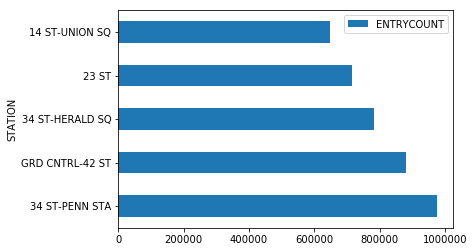

In [52]:
top5.plot(kind='barh',x='STATION')

In [53]:
pennDF = df2.loc[df2.STATION == '34 ST-PENN STA']

In [54]:
pennDF.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,KEY,DATETIME,ENTRYCOUNT,DAY,NAMEDAY,HOUR
50417,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,04/15/2017,04:00:00,1803492,"N067,R012,00-00-00,34 ST-PENN STA",2017-04-15 04:00:00,1.0,5,Friday,4
50418,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,04/15/2017,08:00:00,1803497,"N067,R012,00-00-00,34 ST-PENN STA",2017-04-15 08:00:00,5.0,5,Friday,8
50419,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,04/15/2017,12:00:00,1803540,"N067,R012,00-00-00,34 ST-PENN STA",2017-04-15 12:00:00,43.0,5,Friday,12
50420,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,04/15/2017,16:00:00,1803584,"N067,R012,00-00-00,34 ST-PENN STA",2017-04-15 16:00:00,44.0,5,Friday,16
50421,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,04/15/2017,20:00:00,1803606,"N067,R012,00-00-00,34 ST-PENN STA",2017-04-15 20:00:00,22.0,5,Friday,20


In [55]:
pennDayGroup = pennDF.groupby('DAY').ENTRYCOUNT.sum()
pennDayGroup

DAY
0    164432.0
1    168997.0
2    181579.0
3    132977.0
4    185995.0
5     67742.0
6     73556.0
Name: ENTRYCOUNT, dtype: float64

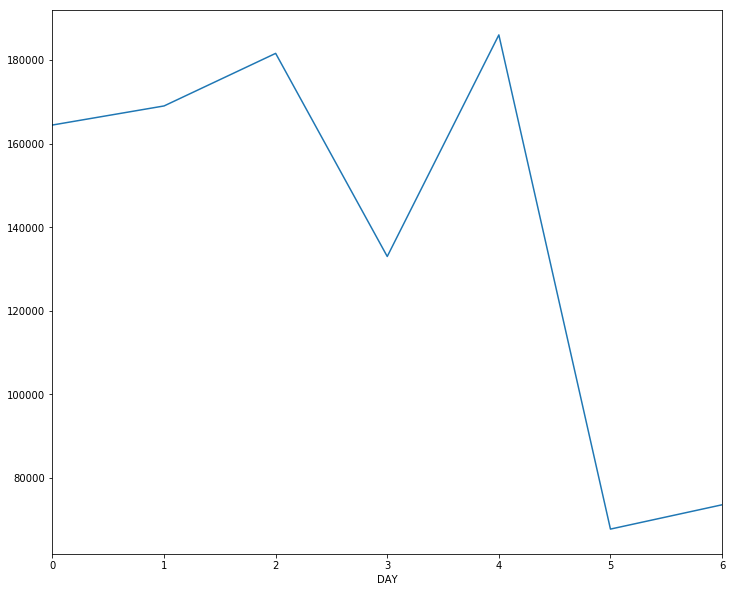

In [56]:
pennDayGroup.plot(kind='line',figsize=(12,10))

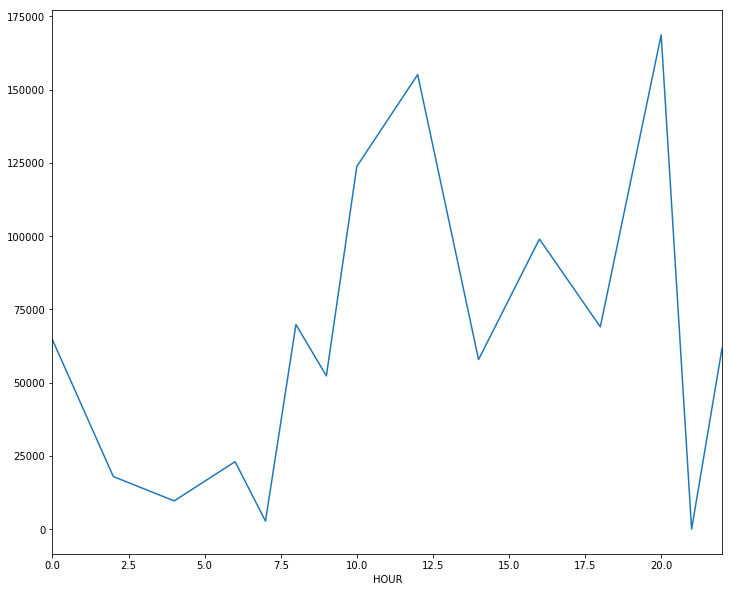

In [57]:
pennHourGroup = pennDF.groupby('HOUR').ENTRYCOUNT.sum()
pennHourGroup.plot(kind='line', figsize=(12,10))

In [58]:
pennHourGroup

HOUR
0      64629.0
2      17946.0
4       9641.0
6      23030.0
7       2740.0
8      69820.0
9      52295.0
10    123763.0
12    155109.0
14     57869.0
16     98984.0
18     69032.0
20    168653.0
21        19.0
22     61748.0
Name: ENTRYCOUNT, dtype: float64

In [59]:
pennDF.DATETIME.value_counts()

2017-04-15 08:00:00    77
2017-04-15 16:00:00    77
2017-04-15 04:00:00    77
2017-04-15 20:00:00    77
2017-04-16 08:00:00    77
2017-04-15 12:00:00    77
2017-04-16 04:00:00    77
2017-04-16 00:00:00    77
2017-04-16 12:00:00    77
2017-04-16 16:00:00    76
2017-04-20 08:00:00    76
2017-04-19 04:00:00    76
2017-04-16 20:00:00    76
2017-04-18 08:00:00    76
2017-04-20 00:00:00    76
2017-04-19 12:00:00    76
2017-04-17 04:00:00    76
2017-04-18 00:00:00    76
2017-04-18 04:00:00    76
2017-04-18 20:00:00    76
2017-04-18 16:00:00    76
2017-04-19 00:00:00    76
2017-04-17 12:00:00    76
2017-04-20 04:00:00    76
2017-04-19 08:00:00    76
2017-04-17 20:00:00    76
2017-04-19 20:00:00    76
2017-04-17 00:00:00    76
2017-04-17 08:00:00    76
2017-04-17 16:00:00    75
                       ..
2017-04-21 14:00:00    21
2017-04-19 14:00:00    21
2017-04-16 22:00:00    21
2017-04-18 10:00:00    21
2017-04-21 10:00:00    21
2017-04-21 06:00:00    21
2017-04-17 14:00:00    21
2017-04-20 1

## Challenge 5

In [60]:
turnstiles = df2.groupby(['C/A', 'UNIT', 'STATION','DATE']).ENTRYCOUNT.sum().reset_index()

In [61]:
type(turnstiles)

pandas.core.frame.DataFrame

In [62]:
turnstiles.head()

,C/A,UNIT,STATION,DATE,ENTRYCOUNT
0,A002,R051,59 ST,04/15/2017,7487.0
1,A002,R051,59 ST,04/16/2017,6951.0
2,A002,R051,59 ST,04/17/2017,12839.0
3,A002,R051,59 ST,04/18/2017,14583.0
4,A002,R051,59 ST,04/19/2017,14975.0


## Challenge 6

In [63]:
station = df.groupby(['STATION','DATE']).ENTRYCOUNT.sum().reset_index()

In [64]:
station.head()

,STATION,DATE,ENTRYCOUNT
0,1 AV,04/15/2017,11837.0
1,1 AV,04/16/2017,11716.0
2,1 AV,04/17/2017,17238.0
3,1 AV,04/18/2017,19657.0
4,1 AV,04/19/2017,22889.0


In [65]:
station1 = station.loc[station.STATION == '1 AV']

In [66]:
type(station1)

pandas.core.frame.DataFrame

In [67]:
# firstAveGroup = station.groupby('DATE')

In [68]:
# firstAveGroup.plot(x=firstAveGroup.indices,y='ENTRYCOUNT')

## Challenge 7

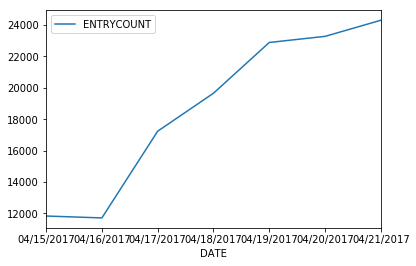

In [69]:
station1.plot(y='ENTRYCOUNT',x='DATE')

## Top 5 Stations based on Entries

In [70]:
top5stations = df.groupby('STATION').ENTRYCOUNT.sum().reset_index()

In [71]:
#top5stations = top5stations.sort_values('ENTRYCOUNT',ascending=False)

In [72]:
top5stations.loc[top5stations.STATION == 'EASTCHSTER/DYRE']

,STATION,ENTRYCOUNT
207,EASTCHSTER/DYRE,23548.0


In [73]:
df.loc[df.STATION == 'EASTCHSTER/DYRE']

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,KEY,DATETIME,ENTRYCOUNT
195352,R730,R431,00-00-00,EASTCHSTER/DYRE,5,IRT,04/15/2017,01:00:00,1330615,"R730,R431,00-00-00,EASTCHSTER/DYRE",2017-04-15 01:00:00,NaN
195353,R730,R431,00-00-00,EASTCHSTER/DYRE,5,IRT,04/15/2017,05:00:00,1330618,"R730,R431,00-00-00,EASTCHSTER/DYRE",2017-04-15 05:00:00,3.0
195354,R730,R431,00-00-00,EASTCHSTER/DYRE,5,IRT,04/15/2017,09:00:00,1330618,"R730,R431,00-00-00,EASTCHSTER/DYRE",2017-04-15 09:00:00,0.0
195355,R730,R431,00-00-00,EASTCHSTER/DYRE,5,IRT,04/15/2017,13:00:00,1330618,"R730,R431,00-00-00,EASTCHSTER/DYRE",2017-04-15 13:00:00,0.0
195356,R730,R431,00-00-00,EASTCHSTER/DYRE,5,IRT,04/15/2017,17:00:00,1330618,"R730,R431,00-00-00,EASTCHSTER/DYRE",2017-04-15 17:00:00,0.0
195357,R730,R431,00-00-00,EASTCHSTER/DYRE,5,IRT,04/15/2017,21:00:00,1330618,"R730,R431,00-00-00,EASTCHSTER/DYRE",2017-04-15 21:00:00,0.0
195358,R730,R431,00-00-00,EASTCHSTER/DYRE,5,IRT,04/16/2017,01:00:00,1330618,"R730,R431,00-00-00,EASTCHSTER/DYRE",2017-04-16 01:00:00,0.0
195359,R730,R431,00-00-00,EASTCHSTER/DYRE,5,IRT,04/16/2017,05:00:00,1330618,"R730,R431,00-00-00,EASTCHSTER/DYRE",2017-04-16 05:00:00,0.0
195360,R730,R431,00-00-00,EASTCHSTER/DYRE,5,IRT,04/16/2017,09:00:00,1330618,"R730,R431,00-00-00,EASTCHSTER/DYRE",2017-04-16 09:00:00,0.0
195361,R730,R431,00-00-00,EASTCHSTER/DYRE,5,IRT,04/16/2017,13:00:00,1330618,"R730,R431,00-00-00,EASTCHSTER/DYRE",2017-04-16 13:00:00,0.0


In [74]:
df.ENTRYCOUNT.min()

-9415811.0

In [75]:
# Replace Days with Name Days
##titanic.sex=titanic.sex.replace({'female':0,'male':1})